# Image Compression with SVD

**Singular value decomposition** (SVD) is a factorization method which generalizes the eigendecomposition for rectangular matrices. SVD can be used to approximate a matrice. 

The decomposition of the matrix $X$ is defined as : $X=U\Sigma V^{T}$ where $X$ and $V^{T}$ are unitary matices and $\Sigma$ is a rectangular diagonal matrice.

This example showcases the use of SVD  for a simple image compression.

## Load Data

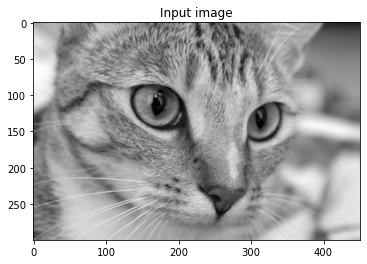

X shape : (300, 451)


In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import skimage

# Load and prepare the image (X)
#filepath = './resources/cat.jpg'
#A = mpimg.imread(filepath)
A = skimage.data.chelsea()
X = np.mean(A, 2) # from RGB to grayscale

# Show the grayscale image and image shape
img = plt.imshow(X)
img.set_cmap('gray')
plt.title('Input image')
plt.show()
print('X shape :', X.shape)

## SVD decomposition

Compute the decomposition : $X=U\Sigma V^{T}$


In [3]:
U, singular_values, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(singular_values)

print('U shape :', U.shape)
print('Sigma shape :', S.shape)
print('VT shape :', VT.shape)

U shape : (300, 300)
Sigma shape : (300, 300)
VT shape : (300, 451)


##  Compress

Rebuild with an approximated $X \approx U_{r}\Sigma_{r} {V_{r}}^{T} $.

The **singular values** are sorted by Numpy in descending order, so we can use the first few columns $\Sigma$ to extract the most relevant informations.


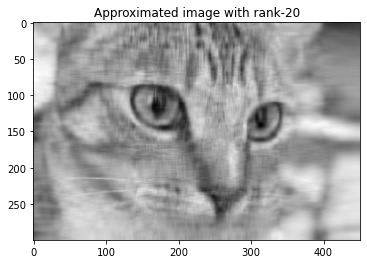

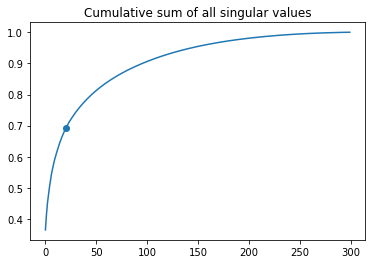

Ur shape : (300, 20)
Sr shape : (20, 20)
Vtr shape : (20, 451)
approximatedX shape : (300, 451)
The compressed image is 9.00x smaller than the original


In [4]:
REDUCED_RANK = 20 # how many singular values to keep

# Compute approximated image
Ur = U[:,:REDUCED_RANK]
Sr = S[:REDUCED_RANK,:REDUCED_RANK]
VTr = VT[:REDUCED_RANK,:]
approximatedX = Ur @ Sr @ VTr

# Show approximated image, cumulative singular values and shapes
ax = plt.subplot()
img = ax.imshow(approximatedX)
img.set_cmap('gray')
plt.title('Approximated image with rank-{}'.format(REDUCED_RANK))
plt.show()

cumulative_sv = np.cumsum(singular_values) / np.sum(singular_values)

ax = plt.subplot()
ax.scatter(REDUCED_RANK,cumulative_sv[REDUCED_RANK])
ax.plot(cumulative_sv)
plt.title('Cumulative sum of all singular values')
plt.show()

print('Ur shape :', Ur.shape)
print('Sr shape :', Sr.shape)
print('Vtr shape :', VTr.shape)
print('approximatedX shape :', approximatedX.shape) # equal to X.shape

ratio = X.size / (Ur.size + REDUCED_RANK + VTr.size)
print('The compressed image is {:.2f}x smaller than the original'.format(ratio))